In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar datos procesados
X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

print("✓ Datos cargados correctamente")
print(f"X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f"X_test: {X_test.shape} | y_test: {y_test.shape}")

✓ Datos cargados correctamente
X_train: (125973, 41) | y_train: (125973,)
X_test: (22544, 41) | y_test: (22544,)


In [3]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evalúa un modelo y muestra métricas completas
    """
    # Predicciones
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Mostrar resultados
    print(f"\n{'='*60}")
    print(f"📊 RESULTADOS: {model_name}")
    print(f"{'='*60}")
    print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMatriz de Confusión:")
    print(f"  TN: {cm[0,0]:,} | FP: {cm[0,1]:,}")
    print(f"  FN: {cm[1,0]:,} | TP: {cm[1,1]:,}")
    
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'confusion_matrix': cm
    }

In [4]:
print("🔄 Entrenando Logistic Regression...")
start_time = time.time()

# Entrenar modelo
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"✓ Entrenamiento completado en {training_time:.2f} segundos")

# Evaluar
lr_results = evaluate_model(lr_model, X_test, y_test, "Logistic Regression")
lr_results['training_time'] = training_time

🔄 Entrenando Logistic Regression...
✓ Entrenamiento completado en 19.67 segundos

📊 RESULTADOS: Logistic Regression
Accuracy:  0.7537 (75.37%)
Precision: 0.9252
Recall:    0.6172
F1-Score:  0.7405
ROC-AUC:   0.8716

Matriz de Confusión:
  TN: 9,071 | FP: 640
  FN: 4,912 | TP: 7,921


In [5]:
print("🔄 Entrenando Decision Tree...")
start_time = time.time()

# Entrenar modelo
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42
)
dt_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"✓ Entrenamiento completado en {training_time:.2f} segundos")

# Evaluar
dt_results = evaluate_model(dt_model, X_test, y_test, "Decision Tree")
dt_results['training_time'] = training_time

🔄 Entrenando Decision Tree...
✓ Entrenamiento completado en 1.06 segundos

📊 RESULTADOS: Decision Tree
Accuracy:  0.7531 (75.31%)
Precision: 0.9230
Recall:    0.6177
F1-Score:  0.7401
ROC-AUC:   0.8450

Matriz de Confusión:
  TN: 9,050 | FP: 661
  FN: 4,906 | TP: 7,927


In [6]:
print("🔄 Entrenando Random Forest...")
start_time = time.time()

# Entrenar modelo
rf_model = RandomForestClassifier(
    n_estimators=100,      # 100 árboles
    max_depth=15,          # Profundidad máxima
    min_samples_split=50,
    min_samples_leaf=20,
    n_jobs=-1,             # Usar todos los cores
    random_state=42
)
rf_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"✓ Entrenamiento completado en {training_time:.2f} segundos")

# Evaluar
rf_results = evaluate_model(rf_model, X_test, y_test, "Random Forest")
rf_results['training_time'] = training_time

🔄 Entrenando Random Forest...
✓ Entrenamiento completado en 4.24 segundos

📊 RESULTADOS: Random Forest
Accuracy:  0.7674 (76.74%)
Precision: 0.9650
Recall:    0.6137
F1-Score:  0.7503
ROC-AUC:   0.9685

Matriz de Confusión:
  TN: 9,425 | FP: 286
  FN: 4,957 | TP: 7,876


In [7]:
# Crear DataFrame de comparación
comparison_df = pd.DataFrame([
    {
        'Modelo': lr_results['model_name'],
        'Accuracy': lr_results['accuracy'],
        'Precision': lr_results['precision'],
        'Recall': lr_results['recall'],
        'F1-Score': lr_results['f1_score'],
        'ROC-AUC': lr_results['roc_auc'],
        'Tiempo (s)': lr_results['training_time']
    },
    {
        'Modelo': dt_results['model_name'],
        'Accuracy': dt_results['accuracy'],
        'Precision': dt_results['precision'],
        'Recall': dt_results['recall'],
        'F1-Score': dt_results['f1_score'],
        'ROC-AUC': dt_results['roc_auc'],
        'Tiempo (s)': dt_results['training_time']
    },
    {
        'Modelo': rf_results['model_name'],
        'Accuracy': rf_results['accuracy'],
        'Precision': rf_results['precision'],
        'Recall': rf_results['recall'],
        'F1-Score': rf_results['f1_score'],
        'ROC-AUC': rf_results['roc_auc'],
        'Tiempo (s)': rf_results['training_time']
    }
])

print("\n" + "="*80)
print("📊 COMPARACIÓN DE MODELOS")
print("="*80)
print(comparison_df.to_string(index=False))

# Mejor modelo
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Modelo']
print(f"\n🏆 MEJOR MODELO: {best_model}")


📊 COMPARACIÓN DE MODELOS
             Modelo  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Tiempo (s)
Logistic Regression  0.753726   0.925242 0.617237  0.740488 0.871586   19.670265
      Decision Tree  0.753061   0.923032 0.617704  0.740115 0.845035    1.064557
      Random Forest  0.767433   0.964960 0.613730  0.750274 0.968532    4.235037

🏆 MEJOR MODELO: Random Forest


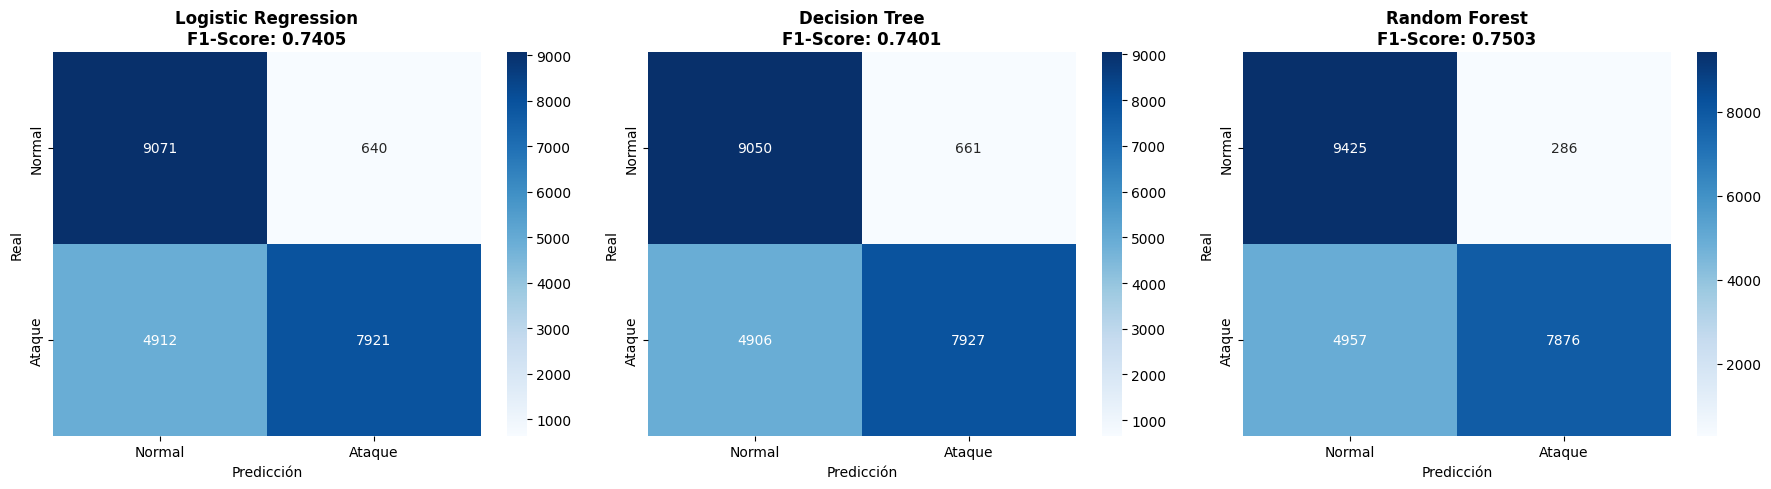

✓ Gráfico guardado en /visualizations/confusion_matrices.png


In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_results = [lr_results, dt_results, rf_results]

for idx, result in enumerate(models_results):
    cm = result['confusion_matrix']
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Normal', 'Ataque'],
                yticklabels=['Normal', 'Ataque'])
    axes[idx].set_title(f"{result['model_name']}\nF1-Score: {result['f1_score']:.4f}", 
                       fontweight='bold')
    axes[idx].set_ylabel('Real')
    axes[idx].set_xlabel('Predicción')

plt.tight_layout()
plt.savefig('../visualizations/confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado en /visualizations/confusion_matrices.png")

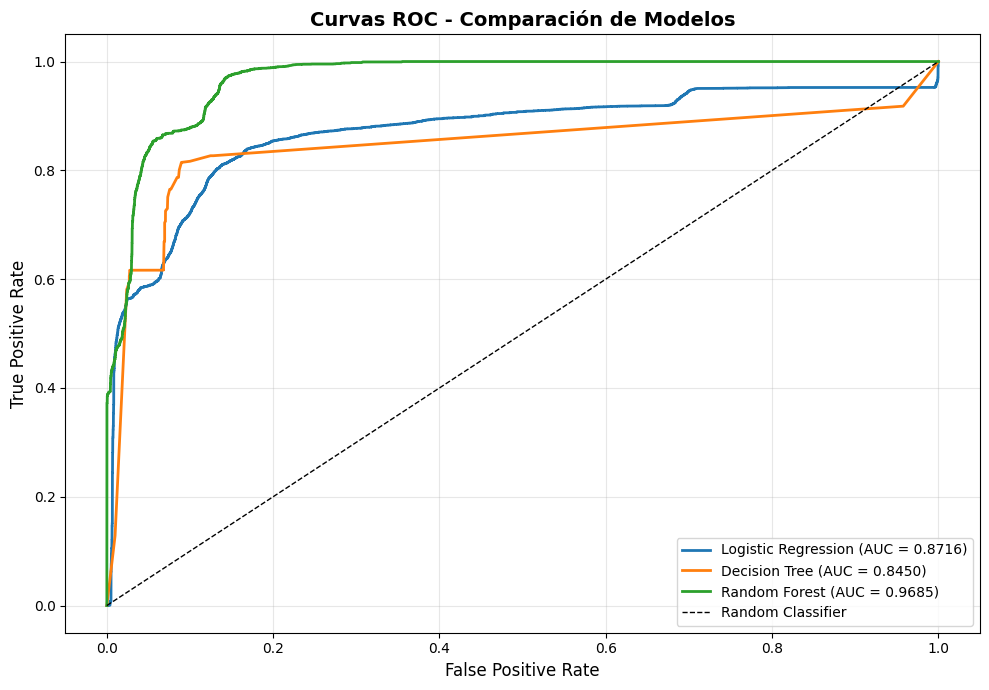

✓ Gráfico guardado en /visualizations/roc_curves.png


In [9]:
plt.figure(figsize=(10, 7))

models_data = [
    (lr_results, 'Logistic Regression'),
    (dt_results, 'Decision Tree'),
    (rf_results, 'Random Forest')
]

for result, name in models_data:
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    auc = result['roc_auc']
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.4f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../visualizations/roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado en /visualizations/roc_curves.png")

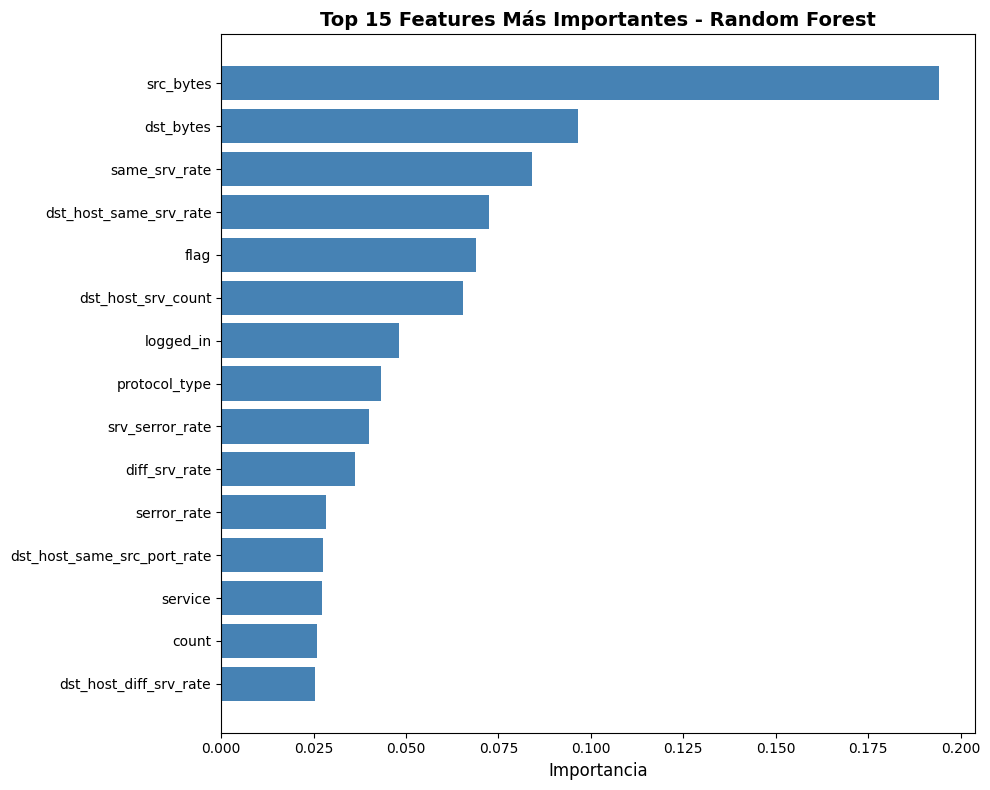

✓ Gráfico guardado en /visualizations/feature_importance.png

Top 10 Features:
               feature  importance
             src_bytes    0.194173
             dst_bytes    0.096484
         same_srv_rate    0.084090
dst_host_same_srv_rate    0.072468
                  flag    0.068913
    dst_host_srv_count    0.065451
             logged_in    0.048203
         protocol_type    0.043333
       srv_serror_rate    0.039872
         diff_srv_rate    0.036161


In [10]:
# Obtener importancia de features
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Top 15 features
top_features = feature_importance.head(15)

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia', fontsize=12)
plt.title('Top 15 Features Más Importantes - Random Forest', 
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../visualizations/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado en /visualizations/feature_importance.png")
print("\nTop 10 Features:")
print(feature_importance.head(10).to_string(index=False))

In [11]:
import pickle

# Guardar Random Forest (mejor modelo)
pickle.dump(rf_model, open('../data/processed/best_model.pkl', 'wb'))

print("✓ Modelo Random Forest guardado como 'best_model.pkl'")
print("\n🎉 ¡MODELADO COMPLETADO!")

✓ Modelo Random Forest guardado como 'best_model.pkl'

🎉 ¡MODELADO COMPLETADO!


In [12]:
print("="*70)
print("RESPUESTAS - ANÁLISIS DE MODELOS")
print("="*70)

# PREGUNTA 1: Mejor modelo
print("\n1️⃣ ¿QUÉ MODELO TUVO MEJOR F1-SCORE?")
print("-"*70)

models_comparison = [
    ('Logistic Regression', lr_results['f1_score']),
    ('Decision Tree', dt_results['f1_score']),
    ('Random Forest', rf_results['f1_score'])
]

for name, score in models_comparison:
    print(f"   {name:20s}: {score:.4f} ({score*100:.2f}%)")

best_model_name = max(models_comparison, key=lambda x: x[1])[0]
best_f1 = max(models_comparison, key=lambda x: x[1])[1]

print(f"\n   🏆 GANADOR: {best_model_name} con F1-Score de {best_f1:.4f}")
print(f"   ✓ Detecta {rf_results['recall']*100:.2f}% de ataques con {rf_results['precision']*100:.2f}% de precisión")

# PREGUNTA 2: Top 3 Features
print("\n\n2️⃣ ¿CUÁLES SON LAS 3 FEATURES MÁS IMPORTANTES?")
print("-"*70)

top_3_features = feature_importance.head(3)

for i, (idx, row) in enumerate(top_3_features.iterrows(), 1):
    print(f"\n   {i}. {row['feature'].upper()}")
    print(f"      Importancia: {row['importance']:.4f} ({row['importance']*100:.2f}%)")
    
    # Explicación de cada feature
    explanations = {
        'src_bytes': 'Bytes enviados - detecta ataques DoS por volumen anormal',
        'dst_bytes': 'Bytes recibidos - identifica exfiltración de datos',
        'count': 'Conexiones en 2s - detecta escaneos y ataques masivos',
        'srv_count': 'Conexiones al servicio - patrones de ataque específicos',
        'duration': 'Duración de conexión - ataques suelen ser más cortos'
    }
    
    if row['feature'] in explanations:
        print(f"      → {explanations[row['feature']]}")

total_top3 = top_3_features['importance'].sum()
print(f"\n   ✓ Estas 3 features explican el {total_top3*100:.2f}% del modelo")

print("\n" + "="*70)
print("✅ ANÁLISIS COMPLETADO")
print("="*70)

RESPUESTAS - ANÁLISIS DE MODELOS

1️⃣ ¿QUÉ MODELO TUVO MEJOR F1-SCORE?
----------------------------------------------------------------------
   Logistic Regression : 0.7405 (74.05%)
   Decision Tree       : 0.7401 (74.01%)
   Random Forest       : 0.7503 (75.03%)

   🏆 GANADOR: Random Forest con F1-Score de 0.7503
   ✓ Detecta 61.37% de ataques con 96.50% de precisión


2️⃣ ¿CUÁLES SON LAS 3 FEATURES MÁS IMPORTANTES?
----------------------------------------------------------------------

   1. SRC_BYTES
      Importancia: 0.1942 (19.42%)
      → Bytes enviados - detecta ataques DoS por volumen anormal

   2. DST_BYTES
      Importancia: 0.0965 (9.65%)
      → Bytes recibidos - identifica exfiltración de datos

   3. SAME_SRV_RATE
      Importancia: 0.0841 (8.41%)

   ✓ Estas 3 features explican el 37.47% del modelo

✅ ANÁLISIS COMPLETADO
